# Predicting Stock Market with ML

## Downloading BTC Price Data

In [ ]:
# yfinance offers a threaded and Pythonic way to download market data from Yahoo!Ⓡ finance.
import yfinance as yf

In [ ]:
# The first thing we do is to initialize the Ticker class
btc = yf.Ticker("BTC-USD")

In [ ]:
# The next thing is to query the  historical prices
btc = btc.history(period = "max")

In [ ]:
# Now we have all the data of btc stored in a pandas dataframe
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-14 00:00:00+00:00,63836.230469,65824.429688,62205.851562,65738.726562,49084320047,0.0,0.0
2024-04-15 00:00:00+00:00,65739.648438,66878.648438,62332.070312,63426.210938,43595917654,0.0,0.0
2024-04-16 00:00:00+00:00,63419.296875,64355.667969,61716.402344,63811.863281,42847528078,0.0,0.0


In [ ]:
btc.index

DatetimeIndex(['2014-09-17 00:00:00+00:00', '2014-09-18 00:00:00+00:00',
               '2014-09-19 00:00:00+00:00', '2014-09-20 00:00:00+00:00',
               '2014-09-21 00:00:00+00:00', '2014-09-22 00:00:00+00:00',
               '2014-09-23 00:00:00+00:00', '2014-09-24 00:00:00+00:00',
               '2014-09-25 00:00:00+00:00', '2014-09-26 00:00:00+00:00',
               ...
               '2024-04-09 00:00:00+00:00', '2024-04-10 00:00:00+00:00',
               '2024-04-11 00:00:00+00:00', '2024-04-12 00:00:00+00:00',
               '2024-04-13 00:00:00+00:00', '2024-04-14 00:00:00+00:00',
               '2024-04-15 00:00:00+00:00', '2024-04-16 00:00:00+00:00',
               '2024-04-17 00:00:00+00:00', '2024-04-18 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=3502, freq=None)

## Cleaning and Visualizing our Stock Market Data

<Axes: xlabel='Date'>

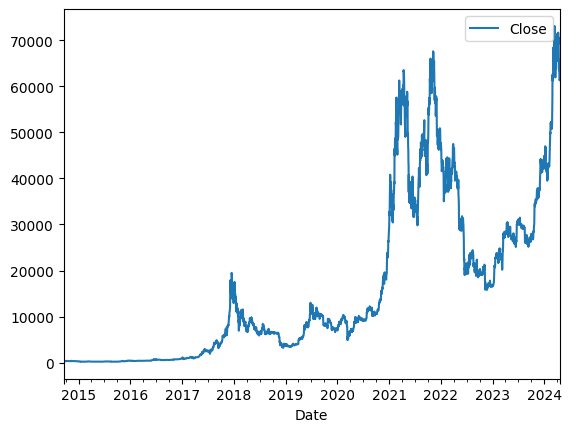

In [ ]:
btc.plot.line(y = "Close", use_index = True)

In [ ]:
# For cleaning the data a bit, now we delete the unused columns (Dividends and Stock Splits)
del btc["Dividends"]
del btc["Stock Splits"]

## Setting Up our Target for Machine Learning

The next thing we are going to do is to set up our target, what we are actually going to be predicting using our ML model.

Our target is going to be "will the price go up or down tomorrow". Some people like to predict the absolute price,  trying to predict if the stock market will be $X tomorrow, that has a big problem. Even though your model is great at predicting absolute values, you can loose a lot of money. In stock markets money is not made in the absolute values, but in the directionality of it's tredns.

In [ ]:
# Here we create a variable called Tomorrow where we store the closing price of the last sesion
btc["Tomorrow"] =  btc["Close"].shift(-1)

In [ ]:
btc

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,424.440002
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,394.795990
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,408.903992
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,398.821014
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,402.152008
...,...,...,...,...,...,...
2024-04-14 00:00:00+00:00,63836.230469,65824.429688,62205.851562,65738.726562,49084320047,63426.210938
2024-04-15 00:00:00+00:00,65739.648438,66878.648438,62332.070312,63426.210938,43595917654,63811.863281
2024-04-16 00:00:00+00:00,63419.296875,64355.667969,61716.402344,63811.863281,42847528078,61276.691406


In [ ]:
# Now we store our target variable, it will be 1 when the market went up and 0 when the market went down
btc["Target"] = (btc["Tomorrow"] > btc["Close"]).astype(int)

In [ ]:
btc

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,424.440002,0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,394.795990,0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,408.903992,1
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,398.821014,0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,402.152008,1
...,...,...,...,...,...,...,...
2024-04-14 00:00:00+00:00,63836.230469,65824.429688,62205.851562,65738.726562,49084320047,63426.210938,0
2024-04-15 00:00:00+00:00,65739.648438,66878.648438,62332.070312,63426.210938,43595917654,63811.863281,1
2024-04-16 00:00:00+00:00,63419.296875,64355.667969,61716.402344,63811.863281,42847528078,61276.691406,0


Something that we will do if we were dealing with a more stablished and old market will be to remove part of the historical data.

This is because, imagine for example we were working with the S&P500, we will have a lot of historical data in the dataframe, what usually is great for training predictors, but while working with stock markets data, we face the problem that if you go back to far, the market could have shifted fundamentally and some of that old data may not be as useful in making future predictions.

In [ ]:
# Pandas dataframe loc method only takes the rows of the specified indexes
# sp500 = sp500.loc["1990-01-01":].copy()

## Training an Initial Machine Learning Model

With the data already set up we can start to train our first ML model.

For our first ML model we are going to use something called a random forest classifier. It's usually a good idea to use random forest as your default model for most machine learning, for a few reasons:


*   Random forests work by training a bunch of individual decision trees with randomized parameters and then averaging the results from those decision trees. Because of this process, random forests are resistent to overfitting, obiously they can do it but it's more difficult for them to overfit if compared with other models.
*   Random forests run relatively quickly.
*   They can pick up non linear tendencies in the data.

Note: In the stock market, most of the relationships are non linear, if you can find a linear relationship you can make a lot of money.



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# The hyperparameters are the following:
# n_stimators is the number of individual decision trees we want to train, the higher generally the better
# your accuracy is, up to a limit.
# min_samples_split helps us to protect against overfitting, decision trees have a tendecy to overfit if they
# build the tree too deeply. The higher we set this value, the less accurate the model will be but the less it will
# overfit.
# random_state as Random Forests has a random part, this is just the randomness seed, for replication pourposes

model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)

# It's important to note that this is time series data and with time series data you should not use cross validation.
# If cross validation is used with this kind of data, results will look amazing when you are training and
# horrible in the real world, the reason behind this is because when you use cross validation or another way
# to split up your training and testing set that doesn't take the time series nature of the data into account.
# What this means is that you will be using future data to predict the past, what you can't do in the real
# world and will result in something called leakage where you're leaking information into the model.
# So, for example, if i told tou to predict tomorrow and i gave you what the stock price is going to be in 30 days,
# you would probably do better at predicting the stock price tomorrow than if i dind't tell you anything about
# the future.

train = btc.iloc[:-100]
test = btc.iloc[-100:]

# We have to be careful with using the Tomorrow column as a predictor, in that case we'll have a
# great predictor for the training and the test set but random in predictions.
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

Once the trainig process of the model is finished our next step is actually to measure how accurate the model is.

In [ ]:
from sklearn.metrics import precision_score

# Precision score says when we said that the market would go up (when it was a 1) did it actually go up, so what
# percentage of the time when we said the market would go up did it actually go up.
# This is actually a realy good error or accurancy metric for a problem like this one, because we are going to
# assume in this case that we want to buy stock and when we buy stock we want to hold that stock and then sell it
# and we want to make sure that when we buy stock the it's price is actually going to increase.

preds = model.predict(test[predictors])
preds

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [ ]:
preds

Date
2024-01-10 00:00:00+00:00    0
2024-01-11 00:00:00+00:00    1
2024-01-12 00:00:00+00:00    0
2024-01-13 00:00:00+00:00    0
2024-01-14 00:00:00+00:00    1
                            ..
2024-04-14 00:00:00+00:00    0
2024-04-15 00:00:00+00:00    0
2024-04-16 00:00:00+00:00    0
2024-04-17 00:00:00+00:00    0
2024-04-18 00:00:00+00:00    0
Length: 100, dtype: int64

In [ ]:
precision_score(test["Target"], preds)

0.75

Now we plot our predictions.

In [ ]:
combined = pd.concat([test["Target"], preds], axis = 1)

<Axes: xlabel='Date'>

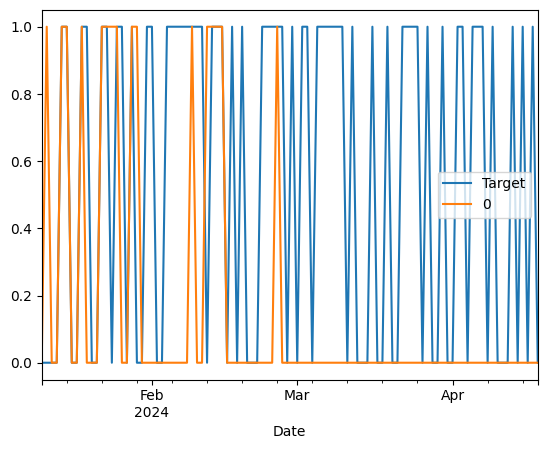

In [ ]:
# In the following plot the blue line is what really happened and the orange line our prediction
combined.plot()

## Building a Backtesting System

The next thing we are going to do is build a more robust way to test our algorithm.

Currently we are only able to test against the last 100 days, but if you're really building a stock price model and you want to use it in the real world you want to be able to test across multiple years of data. This is because you want to know how your algorithm is going to handle a lot of different situations, that gives more confidence that it'll work in the future.

What we are going to do is **back testing**. We start by wrapping everything we have just done in one single function and by defining a backtesting function, wich takes in the stock market data, a ML model, our predictors, a start value and a step value.

The start value, when you back test you want to have a certain amount of data to train your first model (in our case we'll choose 365 because every year has aproximately 365 trading days, so we are saying train your first model with 1 year of data). The step will be also 365, wich means that we will be training a model for about a year and then going to the next year and so on.

In a nutshell, what we're going to do is taking the first year of data and predict values for the 2nd year, then we'll take the first 2 years of data and predict values for the 3rd year, and so on. This way we'll get predictions for a lot of different years and we'll be able to have more confidence in our model.



In [ ]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index = test.index, name = "Predictions")
  combined = pd.concat([test["Target"], preds], axis = 1)
  return combined

In [ ]:
def backtest(data, model, predictors, start = 365, step = 365):
  all_predictions = []
  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [ ]:
predictions = backtest(btc, model, predictors)

In [ ]:
# Now we can actually start evaluating the error of our predictions, so first let's take a look
# at predictions and see how many days we predicted the market would go up vs down
predictions["Predictions"].value_counts()

Predictions
0    1943
1    1194
Name: count, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5142378559463987

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.534906
0    0.465094
Name: count, dtype: float64

## Adding Additional Predictors to our Model

Let's add some new predictors to the model and see how this affects its accurancy.

First of all we are going to create a variety of rolling averages. If you are just a human analyst trying to perdict if the stock will go up tomorrow, some of the numbers you might look at are: is the stock price today higher than it was last week, higher than it was three months ago, a year ago etc, you might use all of those inputs to hel you determine if the stock will go up or down and we are going to give the algorithm that information.

We start by defining a new variable called horizons, these horizons are the ones in wich we want to look at rolling means. We'll use these values to find the ratio between todays closing price and the closing price in those periods. This will help us know, has the market gone up a ton because if so it may be due to a downturn or has the market gone down a ton if so it may be due to an upswing.

In [ ]:
horizons = [2,7,30,120,365]
new_predictors = []

# Here we calculate the rolling averages for every horizon
for horizon in horizons:
  # Here we calculate the average in the horizon time span
  rolling_averages = btc.rolling(horizon).mean()

  # We calculate the ratio between today's close and the average close in the horizon time span
  ratio_column = f"Close_ratio_{horizon}"
  btc[ratio_column] = btc["Close"] / rolling_averages["Close"]

  # The trend will be the number of past days in the horizon time span in wich the stock price actually went up
  # Obviously we cannot do it without the shift because we will be using the current row target, what
  # will induce leakage in the model (we'll be knowing the future).
  trend_column = f"Trend_{horizon}"
  btc[trend_column] = btc.shift(1).rolling(horizon).sum()["Target"]

  # We also add them to our list of predictors
  new_predictors += [ratio_column, trend_column]

In [ ]:
# The new NaN data is due to the fact that when pandas cannot find enough dates to compute the rolling average for
# the specified time stamp, it just stores NaN.
btc

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_7,Trend_7,Close_ratio_30,Trend_30,Close_ratio_120,Trend_120,Close_ratio_365,Trend_365
Date,,,,,,,,,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,424.440002,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,394.795990,0,0.962696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,408.903992,1,0.963815,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,398.821014,0,1.017554,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,402.152008,1,0.987517,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-14 00:00:00+00:00,63836.230469,65824.429688,62205.851562,65738.726562,49084320047,63426.210938,0,1.014798,1.0,0.962349,3.0,0.968371,15.0,1.218732,67.0,1.729951,186.0
2024-04-15 00:00:00+00:00,65739.648438,66878.648438,62332.070312,63426.210938,43595917654,63811.863281,1,0.982096,1.0,0.944706,2.0,0.935174,15.0,1.171866,67.0,1.665121,186.0
2024-04-16 00:00:00+00:00,63419.296875,64355.667969,61716.402344,63811.863281,42847528078,61276.691406,0,1.003031,1.0,0.961348,3.0,0.942982,15.0,1.175157,67.0,1.671115,187.0


In [ ]:
# To solve last problem we just drop the rows with NaN data
btc = btc.dropna()
btc

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_7,Trend_7,Close_ratio_30,Trend_30,Close_ratio_120,Trend_120,Close_ratio_365,Trend_365
Date,,,,,,,,,,,,,,,,,
2015-09-17 00:00:00+00:00,229.076004,230.285004,228.925995,229.809998,18935400,232.975006,1,1.001567,1.0,0.989526,3.0,0.994648,16.0,0.914294,62.0,0.816978,179.0
2015-09-18 00:00:00+00:00,233.520996,234.352997,232.184998,232.975006,20242200,231.492996,0,1.006839,2.0,1.007575,3.0,1.007432,16.0,0.926959,62.0,0.829777,180.0
2015-09-19 00:00:00+00:00,232.858002,233.205002,231.089005,231.492996,12712600,231.212006,0,0.996809,1.0,1.003481,3.0,1.001580,15.0,0.921333,61.0,0.825814,180.0
2015-09-20 00:00:00+00:00,231.399002,232.365005,230.910004,231.212006,14444700,227.085007,0,0.999393,0.0,1.001829,3.0,1.000560,15.0,0.920448,61.0,0.826247,179.0
2015-09-21 00:00:00+00:00,231.216995,231.216995,226.520996,227.085007,19678800,230.617996,1,0.990995,0.0,0.986119,2.0,0.983169,15.0,0.904435,60.0,0.812866,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-13 00:00:00+00:00,67188.375000,67931.429688,60919.105469,63821.472656,52869738185,65738.726562,1,0.974245,0.0,0.927255,3.0,0.938440,14.0,1.187499,67.0,1.683798,185.0
2024-04-14 00:00:00+00:00,63836.230469,65824.429688,62205.851562,65738.726562,49084320047,63426.210938,0,1.014798,1.0,0.962349,3.0,0.968371,15.0,1.218732,67.0,1.729951,186.0
2024-04-15 00:00:00+00:00,65739.648438,66878.648438,62332.070312,63426.210938,43595917654,63811.863281,1,0.982096,1.0,0.944706,2.0,0.935174,15.0,1.171866,67.0,1.665121,186.0


## Improving our Model

In [ ]:
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state = 1)

In [ ]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  # The method predict_proba returns probabilities expected for each case, we will take the probability
  # of the market going up
  preds = model.predict_proba(test[predictors])[:,1]
  # Here we set the threshold for model predicting that the market will go up to 60%, so we make sure
  # that the model has to be more confident that the price will go up in order to actually make that prediction.
  # This makes sense in a model like this because we don't want to make a lot of trades, what we want is
  # to be sure that those trades that we make have as many chances as possible to be a successful one.
  preds[preds >= .6] = 1
  preds[preds < .6] = 0
  preds = pd.Series(preds, index = test.index, name = "Predictions")
  combined = pd.concat([test["Target"], preds], axis = 1)
  return combined

In [ ]:
predictions = backtest(btc, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

Predictions
0.0    1940
1.0     831
Name: count, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5451263537906137

## Summary and Next Steps with the Model

Let's summarize what we've done until this point:

*   Downloaded Bitcoin price data
*   Cleaned and visualized the data
*   Set up our machine learning target
*   Trained our initial model
*   Evaluated error, created a way to backtest and really accurately measure that error over long periods of time
*   Improved our model with some extra predictor columns.





If we wanted to continue extending this model, some interesting lines would be:

*   Taking into account other indexes of traditional stocks, such as the S&P500 and see if we could correlate them with Bitcoin price.

*   Adding news, what includes articles that are coming out or general macroeconomic conditions (interes rates, inflation, etc).

*   Adding key components of the cryptocurrencies market, such as key sectors and key stocks. It's possible that if RWA or AI are in a downturn it's possible that this affects BTC price in some sense, because of the outlfow of capital from that sector.

*   Increasing the resolution, instead of looking at daily data you could try looking at hourly data, minute to minute data, etc.  